## Statistiques descriptives :

Commençons tout d’abord par proposer quelques statistiques descriptives sur notrecorpus. Même si nous réaliserons des normalisations sur la table de fréquences afin de réduire la différence entre ces longueurs de textes, il demeure important de voir si ces textes ne varient pas trop.

Nous savons actuellement que Lennon et McCartney ont écrits 60 chansons chacun (= 120) et 60 chansons sont affichées comme étant le fruit de leur collaboration d'écriture. 

**Objectifs** :

   - Dénombrement du nombre de mots par chanson et comparaison de la longueur des textes
   - Analyse des principaux indices : moyenne, max, min, écart-type, etc.
   - Visualisations.
   - Boxplot pour comparaison entre auteurs et écriture collaborative.
   - Retour réflexif.
   - Exploration d'autres pistes.
---

In [2]:
# Librairie pandas (manipulation de données csv, dataframe, etc.)
import pandas as pd

# Import et lecture du corpus :
corpus = pd.read_csv('./data/corpus_tokmorph_ajout_solo.csv')
del corpus['Unnamed: 0']
corpus.head()

,Song,Album Debut,Songwriter(s),Lead Vocal(s),Year,Lyrics,words,lemma,pos,3grams_pos
0,"""Across the Universe""",Let It Be,Lennon,Lennon,1968,Words are flowing out like endless rain into a...,Words,['word'],['NOUN'],"(['NOUN'], ['AUX'], ['VERB'])"
1,"""Across the Universe""",Let It Be,Lennon,Lennon,1968,Words are flowing out like endless rain into a...,are,['be'],['AUX'],"(['AUX'], ['VERB'], ['ADP'])"
2,"""Across the Universe""",Let It Be,Lennon,Lennon,1968,Words are flowing out like endless rain into a...,flowing,['flow'],['VERB'],"(['VERB'], ['ADP'], ['SCONJ'])"
3,"""Across the Universe""",Let It Be,Lennon,Lennon,1968,Words are flowing out like endless rain into a...,out,['out'],['ADP'],"(['ADP'], ['SCONJ'], ['ADJ'])"
4,"""Across the Universe""",Let It Be,Lennon,Lennon,1968,Words are flowing out like endless rain into a...,like,['like'],['SCONJ'],"(['SCONJ'], ['ADJ'], ['NOUN'])"


In [3]:
# Sélection des colonnes 'Song' et 'words' :
corpus_by_song = corpus[['Song', 'words']]

# Dénombrement :
count_by_song = corpus_by_song.groupby('Song').count()

# Rename 

count_by_song.columns = ['nb_words']

# & song into variable :

count_by_song = count_by_song.reset_index(level=['Song'])

count_by_song

,Song,nb_words
0,"""A Day in the Life""",226
1,"""A Hard Day's Night""",228
2,"""Across the Universe""",250
3,"""All I've Got to Do""",212
4,"""All My Loving""",175
...,...,...
227,Too Many People,203
228,Uncle Albert / Admiral Halsey,343
229,We're All Water,243
230,Woman Is The Nigger Of The World,292


In [4]:
# Ajout de la colonne Songwriter(s) sur la base de corpus_clean_select :
# => merge

corpus_clean_select = pd.read_csv('./data/corpus_nettoye.csv', index_col=None)

df = pd.merge(count_by_song, corpus_clean_select, on=['Song'])

# Sélection des colonnes qui nous intéressent :

count_by_song = df[['Song', 'Songwriter(s)', 'nb_words']]

count_by_song

,Song,Songwriter(s),nb_words
0,"""A Day in the Life""",Lennon-McCartney,226
1,"""A Hard Day's Night""",Lennon-McCartney,228
2,"""Across the Universe""",Lennon,250
3,"""All I've Got to Do""",Lennon,212
4,"""All My Loving""",McCartney,175
...,...,...,...
174,"""You Won't See Me""",McCartney,243
175,"""You'll Be Mine""",Lennon-McCartney,117
176,"""You're Going to Lose That Girl""",Lennon,247
177,"""You've Got to Hide Your Love Away""",Lennon,125


In [5]:
count_by_song[count_by_song['nb_words']<50]

,Song,Songwriter(s),nb_words
137,"""Sun King""",Lennon,43
145,"""The End""",McCartney,30
164,"""Wild Honey Pie""",McCartney,22


In [6]:
# Moyenne / médiane générale (graph)
# Moyenne / médiane par auteur (graph):
# Boxplot comparatif.
# ==> Matrice de corrélation auteur / longueur ?

import matplotlib.pyplot as plt

count_by_song.describe()

,nb_words
count,179.000000
mean,201.558659
std,74.195617
min,22.000000
25%,155.000000
50%,202.000000
75%,242.500000
max,445.000000


In [7]:
# min 1 mot ???
# count_by_song.loc[(count_by_song['nb_words'] == 1)]

# = Cayenne
## ==> Besoin de retirer les NaN précédemment : OK.
## ==> Retour en arrière : retrait NaN et \n dans les paroles.

# 22 paroles ?

count_by_song.loc[(count_by_song['nb_words'] == 22)]

# ==> Wild Honey Pie : https://www.youtube.com/watch?v=l-ekNlk5VDM : ok !

,Song,Songwriter(s),nb_words
164,"""Wild Honey Pie""",McCartney,22


In [8]:
# Création de trois corpus :

corpus_Lennon = count_by_song.loc[(count_by_song['Songwriter(s)'] == "Lennon")]
corpus_McCartney = count_by_song.loc[(count_by_song['Songwriter(s)'] == "McCartney")]
corpus_LMC = count_by_song.loc[(count_by_song['Songwriter(s)'] == "Lennon-McCartney")]

Text(221.71452513966483, 18.0, '201.56')

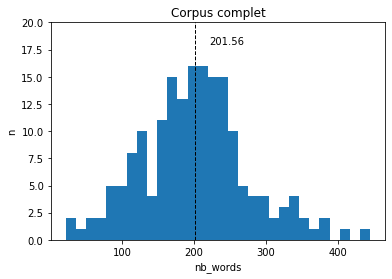

In [9]:
# Corpus complet :

plt.hist(count_by_song["nb_words"], density=False, bins=30)  # density=False would make counts
plt.ylabel('n')
plt.xlabel('nb_words')
plt.title('Corpus complet')
# Ajout ligne moyenne et médiane :
min_ylim, max_ylim = plt.ylim(0,20)
plt.axvline(count_by_song['nb_words'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.text(count_by_song['nb_words'].mean()*1.1, max_ylim*0.9, '{:.2f}'.format(count_by_song['nb_words'].mean()))

In [10]:
corpus_Lennon.describe()

,nb_words
count,60.000000
mean,201.700000
std,71.076302
min,43.000000
25%,157.750000
50%,207.000000
75%,238.250000
max,364.000000


Text(227.70000000000002, 9.0, '207.00')

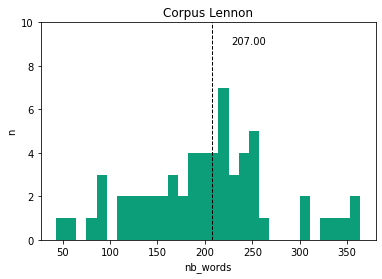

In [11]:
# Corpus Lennon : 

plt.hist(corpus_Lennon["nb_words"], density=False, bins=30, color='#0C9E79')  
plt.ylabel('n')
plt.xlabel('nb_words')
plt.title('Corpus Lennon')
# Ajout ligne moyenne et médiane :
min_ylim, max_ylim = plt.ylim(0,10) # Même échelle pour comparaison !
# plt.axvline(corpus_Lennon['nb_words'].mean(), color='k', linestyle='dashed', linewidth=1)
# plt.text(corpus_Lennon['nb_words'].mean()*1.1, max_ylim*0.8, '{:.2f}'.format(corpus_Lennon['nb_words'].mean()))
plt.axvline(corpus_Lennon['nb_words'].median(), color='k', linestyle='dashed', linewidth=1)
plt.text(corpus_Lennon['nb_words'].median()*1.1, max_ylim*0.9, '{:.2f}'.format(corpus_Lennon['nb_words'].median()))

Text(201.3, 9.0, '183.00')

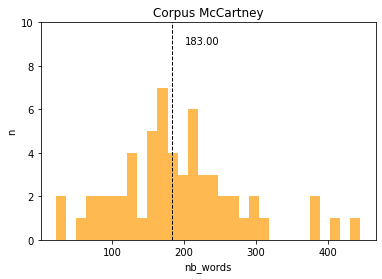

In [12]:
# Corpus McCartney :

plt.hist(corpus_McCartney["nb_words"], density=False, bins=30, color="#FEBA51")
plt.ylabel('n')
plt.ylim(0, 10)
plt.xlabel('nb_words')
plt.title('Corpus McCartney')
# Ajout ligne médiane :
min_ylim, max_ylim = plt.ylim(0,10) # Même échelle pour comparaison !
plt.axvline(corpus_McCartney['nb_words'].median(), color='k', linestyle='dashed', linewidth=1)
plt.text(corpus_McCartney['nb_words'].median()*1.1, max_ylim*0.9, '{:.2f}'.format(corpus_McCartney['nb_words'].median()))

Text(233.75000000000003, 9.0, '212.50')

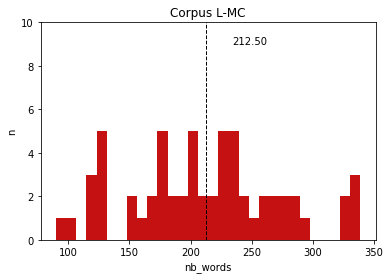

In [13]:
plt.hist(corpus_LMC["nb_words"], density=False, bins=30, color="#C51112")
plt.ylim(0, 10)
plt.ylabel('n')
plt.xlabel('nb_words')
plt.title('Corpus L-MC')
# Ajout ligne médiane :
min_ylim, max_ylim = plt.ylim(0,10) # Même échelle pour comparaison !
plt.axvline(corpus_LMC['nb_words'].median(), color='k', linestyle='dashed', linewidth=1)
plt.text(corpus_LMC['nb_words'].median()*1.1, max_ylim*0.9, '{:.2f}'.format(corpus_LMC['nb_words'].median()))



In [14]:
# https://stackoverflow.com/questions/38783027/jupyter-notebook-display-two-pandas-tables-side-by-side

from IPython.display import display, HTML

CSS = """
div.cell:nth-child(45) .output {
    flex-direction: row;
}
"""
HTML('<style>{}</style>'.format(CSS))

# 46 = indice de la cellule.

display(corpus_Lennon.describe())
display(corpus_McCartney.describe())
display(corpus_LMC.describe())


,nb_words
count,60.000000
mean,201.700000
std,71.076302
min,43.000000
25%,157.750000
50%,207.000000
75%,238.250000
max,364.000000


,nb_words
count,59.000000
mean,191.525424
std,87.414856
min,22.000000
25%,136.500000
50%,183.000000
75%,232.500000
max,445.000000


,nb_words
count,60.000000
mean,211.283333
std,62.030089
min,90.000000
25%,174.250000
50%,212.500000
75%,248.500000
max,339.000000


In [15]:
# Question : Est-ce que la moyenne est le meilleur indicateur ?

In [16]:
# Mise en place d'un index : 

count_by_song = count_by_song.reset_index()

 
count_by_song

,index,Song,Songwriter(s),nb_words
0,0,"""A Day in the Life""",Lennon-McCartney,226
1,1,"""A Hard Day's Night""",Lennon-McCartney,228
2,2,"""Across the Universe""",Lennon,250
3,3,"""All I've Got to Do""",Lennon,212
4,4,"""All My Loving""",McCartney,175
...,...,...,...,...
174,174,"""You Won't See Me""",McCartney,243
175,175,"""You'll Be Mine""",Lennon-McCartney,117
176,176,"""You're Going to Lose That Girl""",Lennon,247
177,177,"""You've Got to Hide Your Love Away""",Lennon,125


Text(0.5, 1.0, 'Corpus complet')

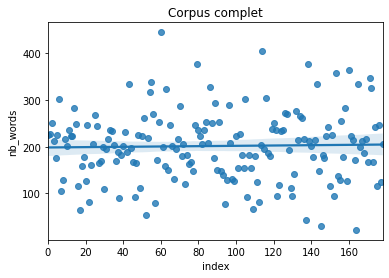

In [17]:
# Scatterplot corpus complet :

import seaborn as sns

sns.regplot(x=count_by_song["index"], y=count_by_song["nb_words"], fit_reg=True).set_title("Corpus complet")

# NB : By default, a linear regression fit is plotted. It can be removed from graph by setting fit_reg=False.

In [18]:
# Interprétation ?
# Pourquoi avoir laissé la régression linéaire ici ? Est-ce pertinent ?

Text(0.5, 1.0, 'Corpus Lennon')

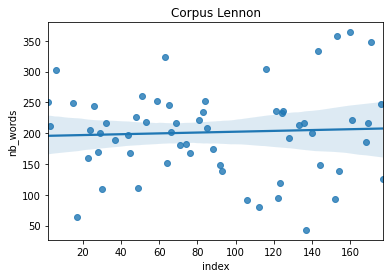

In [19]:
## Scatterplot corpus Lennon :

corpus_Lennon = corpus_Lennon.reset_index()

sns.regplot(x=corpus_Lennon["index"], y=corpus_Lennon["nb_words"], fit_reg=True).set_title("Corpus Lennon")

Text(0.5, 1.0, 'Corpus McCartney')

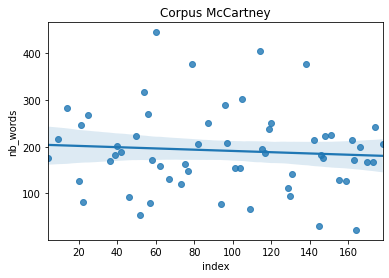

In [20]:
## Scatterplot corpus McCartney :

corpus_McCartney = corpus_McCartney.reset_index()

sns.regplot(x=corpus_McCartney["index"], y=corpus_McCartney["nb_words"], fit_reg=True).set_title("Corpus McCartney")

Text(0.5, 1.0, 'Corpus LMC')

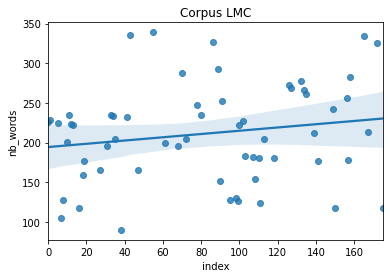

In [21]:
## Scatterplot corpus Lennon-McCartney :

corpus_LMC = corpus_LMC.reset_index()

sns.regplot(x=corpus_LMC["index"], y=corpus_LMC["nb_words"], fit_reg=True).set_title("Corpus LMC")


In [22]:
# Retour réflexif : est-ce que ça a un sens réellement ? Sur quoi se fonde-t-on pour établir ces visualisations ?
# Comment faire pour que ça en est ?

## Pistes : 

### Approche diachronique ?
### Calcul de la pente ?
### Autre ?

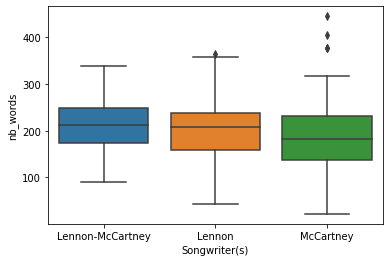

In [23]:
# Boxplot

import seaborn as sns

ax = sns.boxplot(x="Songwriter(s)", y="nb_words", data=count_by_song)

In [24]:
# Sur les boxplots : Cf. Michael Galarnyk, https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51.

In [25]:
## Lecture & interprétation des résultats :




Autres propositions pour enrichir les statistiques descriptives : 
    
   - Analyse de la longueur des phrases et confrontation des différents corpus (ex : https://spacy.io/usage/linguistic-features#custom-tokenizer).
   - Analyse de la richesse lexicale (ex : https://pypi.org/project/lexical-diversity/).

# Analyse de l'utilisation des catégories gramaticals pour chaque chanteur

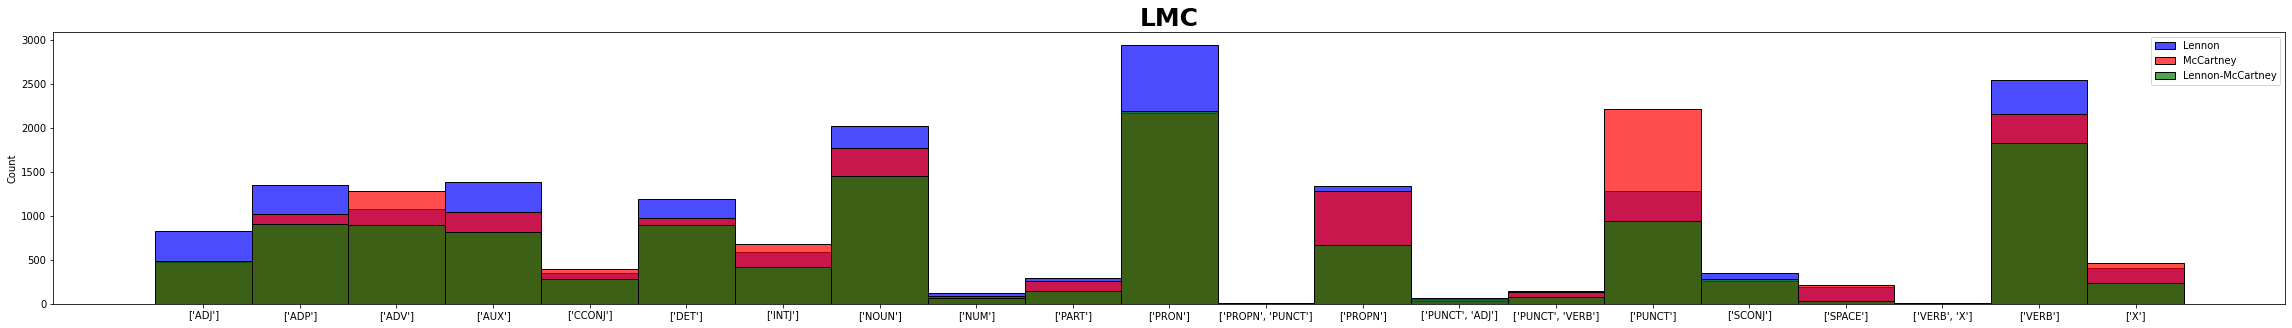

In [31]:
import seaborn as sns
import numpy as np

groupes_gramaticaux  = np.unique(corpus['pos'])

corpus_Lennon = corpus.loc[(corpus['Songwriter(s)'] == "Lennon")]
corpus_McCartney = corpus.loc[(corpus['Songwriter(s)'] == "McCartney")]
corpus_LMC = corpus.loc[(corpus['Songwriter(s)'] == "Lennon-McCartney")]




plt.figure(figsize=(40,5))
sns.histplot(np.sort(corpus_Lennon['pos']), color = 'b', alpha = 0.7, label = 'Lennon')
plt.title('Lennon', weight='bold', fontsize = 25)

#plt.figure(figsize=(40,5))
sns.histplot(np.sort(corpus_McCartney['pos']), color = 'r', alpha = 0.7, label = 'McCartney')
plt.title('McCartney', weight='bold', fontsize = 25)

#plt.figure(figsize=(40,5)
sns.histplot(np.sort(corpus_LMC['pos']), color = 'g', alpha = 0.7, label = 'Lennon-McCartney')
plt.title('LMC', weight='bold', fontsize = 25)
_ = plt.legend()

In [17]:
corpus[corpus['pos']==groupes_gramaticaux[0]]

,Song,Album Debut,Songwriter(s),Lead Vocal(s),Year,Lyrics,words,lemma,pos,3grams_pos
5,"""Across the Universe""",Let It Be,Lennon,Lennon,1968,Words are flowing out like endless rain into a...,endless,['endless'],['ADJ'],"(['ADJ'], ['NOUN'], ['ADP'])"
192,"""Across the Universe""",Let It Be,Lennon,Lennon,1968,Words are flowing out like endless rain into a...,open,['open'],['ADJ'],"(['ADJ'], ['NOUN'], ['VERB'])"
354,"""All I've Got to Do""",UK: With the Beatles\n US: Meet the Beatles!,Lennon,Lennon,1963,Whenever I want you around yeh \nAll I gotta d...,same,['same'],['ADJ'],"(['ADJ'], ['VERB'], ['ADP'])"
440,"""All I've Got to Do""",UK: With the Beatles\n US: Meet the Beatles!,Lennon,Lennon,1963,Whenever I want you around yeh \nAll I gotta d...,same,['same'],['ADJ'],"(['ADJ'], ['VERB'], ['ADP'])"
495,"""All My Loving""",UK: With the Beatles\n US: Meet the Beatles!,McCartney,McCartney,1963,Close your eyes and I'll kiss you\nTomorrow I'...,Close,['close'],['ADJ'],"(['ADJ'], ['DET'], ['NOUN'])"
...,...,...,...,...,...,...,...,...,...,...
40044,"""You'll Be Mine""",Anthology 1,Lennon-McCartney,McCartney,1960,Well darling all the night\nYou'll be mine and...,National,['national'],['ADJ'],"(['ADJ'], ['PROPN'], ['PROPN'])"
40402,"""You're Going to Lose That Girl""",Help!,Lennon,Lennon,1965,You're going to lose that girl\nYou're going t...,right,['right'],['ADJ'],"(['ADJ'], ['PUNCT'], ['DET'])"
40420,"""You're Going to Lose That Girl""",Help!,Lennon,Lennon,1965,You're going to lose that girl\nYou're going t...,right,['right'],['ADJ'],"(['ADJ'], ['PUNCT'], ['CCONJ'])"
40638,"""You've Got to Hide Your Love Away""",Help!,Lennon,Lennon,1965,Here I stand head in hand\nTurn my face to the...,small,['small'],['ADJ'],"(['ADJ'], ['SPACE'], ['ADV'])"


In [ ]:
corpus_Lennon = count_by_song.loc[(count_by_song['Songwriter(s)'] == "Lennon")]
